In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits import mplot3d

In [3]:
sys.path.insert(0, '../')

## Setup detector with card

In [4]:
from detmodel import detector
from detmodel import plane
from detmodel import signal

In [5]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_nsw_vmm_z10.yml')
#my_detector.read_card('../cards/atlas_mm_road.yml')

-- Initializing detector --
-- Reading card --


## Pass muon

In [6]:
my_detector.reset_planes()
my_detector.add_muon(
        mu_x=-5, 
        mu_y=0, 
        mu_theta=-0.015, 
        mu_phi=0, 
        mu_time=0
    )

## Add noise

Noise rate in Hertz per strip is set in detector cards. First argument here is a multiplicative scale factor. Second argument is a random seed number.

In [7]:
my_detector.add_noise(1, randseed=45)

## Process signal

In [8]:
sigs = my_detector.get_signals(summary=True)

Total number of hits: 1
Signal information:
	
{'is_muon': True, 'x': -5.218369646233308, 'y': 0.0, 'z': 10.5, 'ptype': 2, 'ptilt': 0, 'poffset': 1.6, 'time': 0.43123882075487296, 'projX_at_rightend_x': -4.8, 'projX_at_rightend_y': 14.4, 'projX_at_middle_x': -4.8, 'projX_at_middle_y': 0.0, 'projY_at_topend_x': 14.4, 'projY_at_topend_y': -14.4, 'projY_at_middle_x': 0.0, 'projY_at_middle_y': -14.4, 'seg_ix': -9999, 'rdrift': 9999.0}
Total number of hits: 1
Signal information:
	
{'is_muon': True, 'x': -5.244791561047289, 'y': 0.0, 'z': 15.6, 'ptype': 2, 'ptilt': 0, 'poffset': 0, 'time': 0.6427345965945931, 'projX_at_rightend_x': -6.3999999999999995, 'projX_at_rightend_y': 14.4, 'projX_at_middle_x': -6.3999999999999995, 'projX_at_middle_y': 0.0, 'projY_at_topend_x': 14.4, 'projY_at_topend_y': -14.4, 'projY_at_middle_x': 0.0, 'projY_at_middle_y': -14.4, 'seg_ix': -9999, 'rdrift': 9999.0}
Total number of hits: 2
Signal information:
	
{'is_muon': True, 'x': -3.0361907150462017, 'y': 0.0, 'z': 

## Plot detector volume

In [9]:
from plotting import plotting

In [10]:
import importlib
importlib.reload(plotting)

<module 'plotting.plotting' from '../plotting/plotting.py'>

In [11]:
%matplotlib widget

Found muon signal, plane  0  xseg  2  time  0.43123882075487296
Found muon signal, plane  1  xseg  2  time  0.6427345965945931
Found muon signal, plane  2  xseg  3  time  -4.246433638314519
Found muon signal, plane  3  xseg  2  time  1.2012934525387093
Found muon signal, plane  4  xseg  17  time  -96.87413976618451
Found bkg signal, plane  5  xseg  9  time  -43.51709778791169
Found muon signal, plane  6  xseg  16  time  -25.547208609852074
Found bkg signal, plane  7  xseg  27  time  -88.29407924800316
Found muon signal, plane  8  xseg  13  time  36.08720992228896
Found muon signal, plane  9  xseg  13  time  37.07251636655497
Found bkg signal, plane  10  xseg  47  time  -62.086626482202576
Found bkg signal, plane  11  xseg  57  time  95.19884811092777
Found muon signal, plane  12  xseg  1  time  7.90232865833625
Found muon signal, plane  13  xseg  0  time  -3.3318795651908353
Found muon signal, plane  14  xseg  1  time  -4.645662551275489
Found muon signal, plane  15  xseg  0  time  -2.

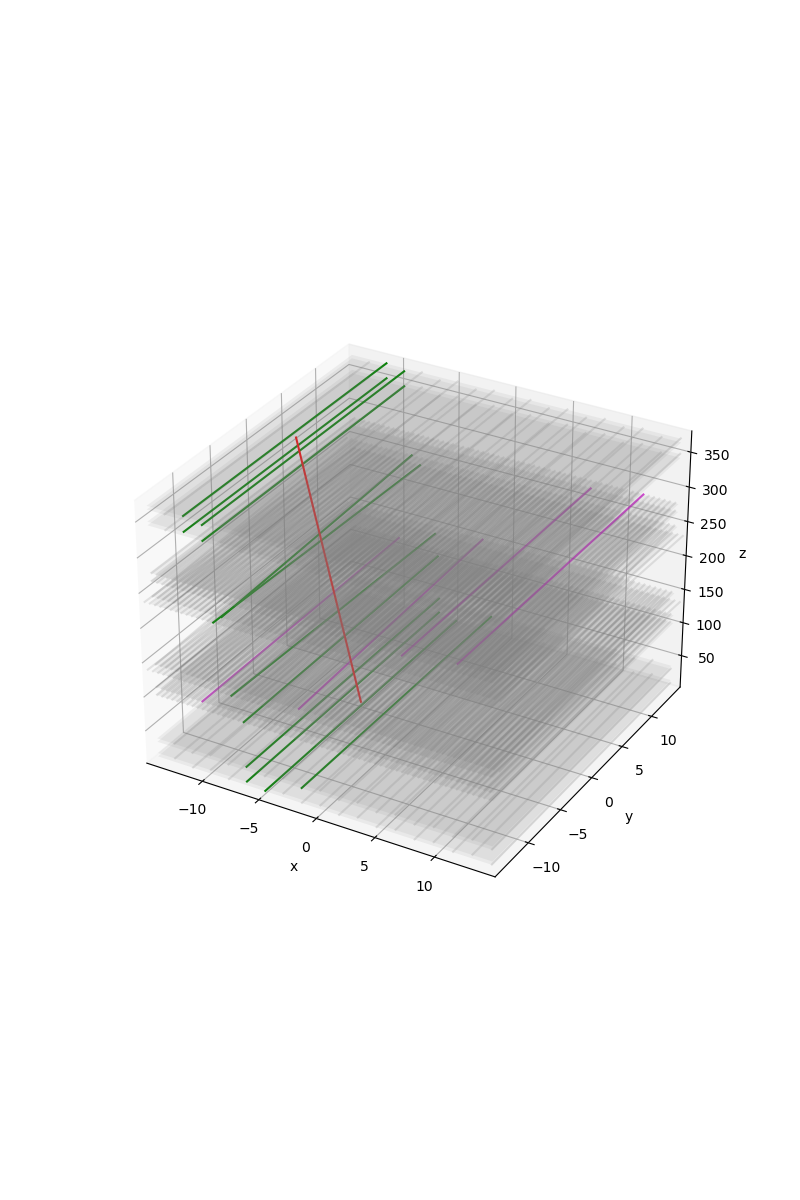

In [12]:
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection='3d')
plotting.plot_det_volume(my_detector, ax, draw_muon=1)

[Point3D(-1616481045161165/333295834036453, 0, -10)] [Point3D(-218958922053/20000000000, 0, 793/2)]


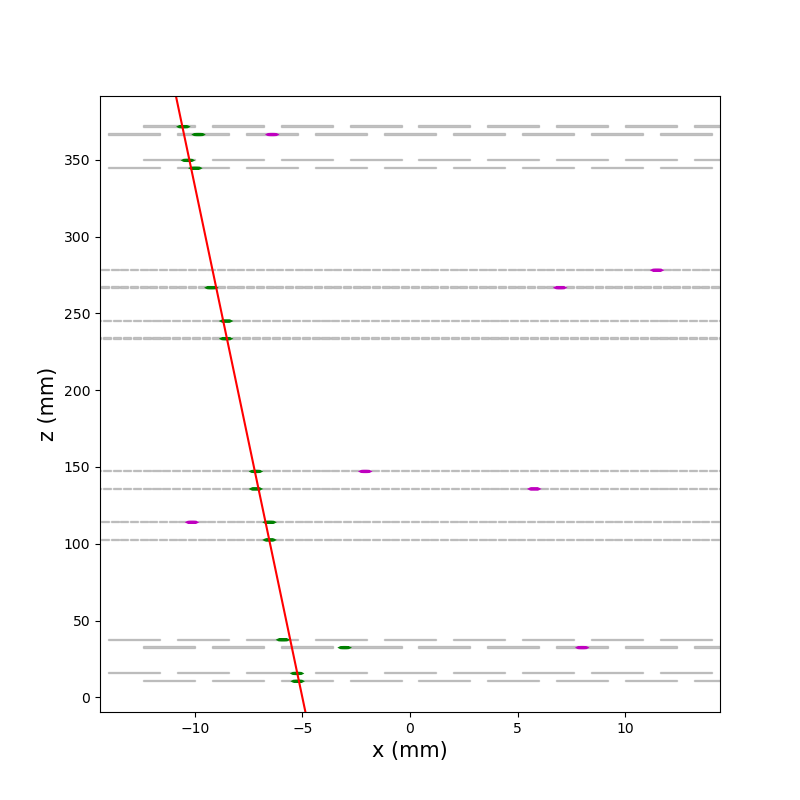

In [13]:
fig2 = plt.figure(figsize=(8,8))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=True)
plt.show()